# Student Performance Predictions

## Dataset Preparation

In [2]:
import pandas as pd
from google.colab import files

files.upload()
df = pd.read_csv('student_performance_dataset.csv')

df.head()

Saving student_performance_dataset.csv to student_performance_dataset.csv


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [4]:
df.isnull().sum()

,0
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


In [5]:
features_ML = df.drop(columns=['Student_ID', 'Gender' ])
features_ML.head()


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,31,68.267841,86,High School,Yes,Yes,63,Pass
1,16,78.222927,73,PhD,No,No,50,Fail
2,21,87.525096,74,PhD,Yes,No,55,Fail
3,27,92.076483,99,Bachelors,No,No,65,Pass
4,37,98.655517,63,Masters,No,Yes,70,Pass


In [6]:
features_ML['Parental_Education_Level'].unique()

array(['High School', 'PhD', 'Bachelors', 'Masters'], dtype=object)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

education_order = ['High School', 'Bachelors', 'Masters', 'PhD']

encoder = OrdinalEncoder(categories=[education_order])

features_ML['Parental_Education_Level'] = encoder.fit_transform(features_ML[['Parental_Education_Level']])
features_ML['Parental_Education_Level'].head()

,Parental_Education_Level
0,0.0
1,3.0
2,3.0
3,1.0
4,2.0


In [8]:
features_ML.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,31,68.267841,86,0.0,Yes,Yes,63,Pass
1,16,78.222927,73,3.0,No,No,50,Fail
2,21,87.525096,74,3.0,Yes,No,55,Fail
3,27,92.076483,99,1.0,No,No,65,Pass
4,37,98.655517,63,2.0,No,Yes,70,Pass


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in ['Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']:
    le = LabelEncoder()
    features_ML[col] = le.fit_transform(features_ML[col])
    label_encoders[col] = le



In [10]:
features_ML.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,31,68.267841,86,0.0,1,1,63,1
1,16,78.222927,73,3.0,0,0,50,0
2,21,87.525096,74,3.0,1,0,55,0
3,27,92.076483,99,1.0,0,0,65,1
4,37,98.655517,63,2.0,0,1,70,1


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']

for col in numeric_cols:

    features_ML[col] = scaler.fit_transform(features_ML[[col]])

In [12]:
features_ML.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,0.548640,-0.713394,0.564773,0.0,1,1,0.631059,1
1,-1.142177,0.008352,-0.338471,3.0,0,0,-1.308910,0
2,-0.578571,0.682762,-0.268991,3.0,1,0,-0.562768,0
3,0.097755,1.012739,1.468017,1.0,0,0,0.929516,1
4,1.224966,1.489721,-1.033274,2.0,0,1,1.675657,1


## Model Building

In [13]:
y = features_ML['Pass_Fail']
x = features_ML.drop(columns=['Pass_Fail'])

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=0.2, random_state=42)

xtrain.shape[0], xtest.shape[0]

(566, 142)

Accuracy:  0.9788732394366197
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.97      0.99      0.98        71

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



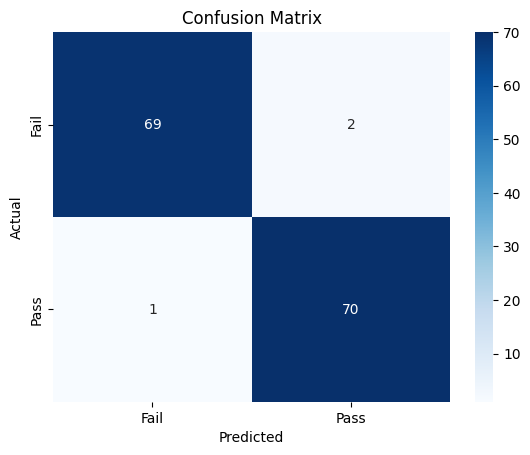

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

LR = LogisticRegression()

LR.fit(xtrain, ytrain)

ypred = LR.predict(xtest)

print("Accuracy: ", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

original_ytest = label_encoders['Pass_Fail'].inverse_transform(ytest)
original_ypred = label_encoders['Pass_Fail'].inverse_transform(ypred)

cm = confusion_matrix(original_ytest, original_ypred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Pass_Fail'].classes_, yticklabels=label_encoders['Pass_Fail'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy:  1.0


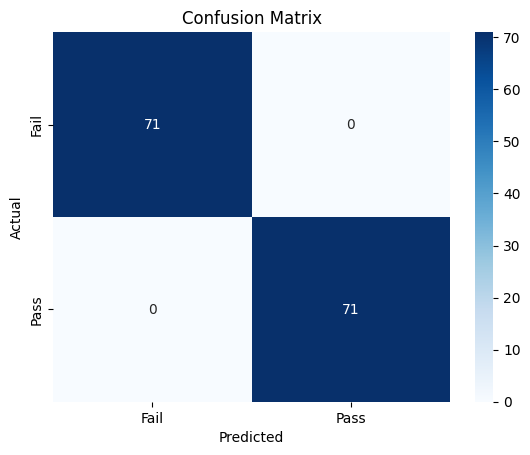

In [15]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(xtrain, ytrain)

ypred = DT.predict(xtest)

print("Accuracy: ", accuracy_score(ytest, ypred))

original_ytest = label_encoders['Pass_Fail'].inverse_transform(ytest)
original_ypred = label_encoders['Pass_Fail'].inverse_transform(ypred)

cm = confusion_matrix(original_ytest, original_ypred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Pass_Fail'].classes_, yticklabels=label_encoders['Pass_Fail'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy:  1.0


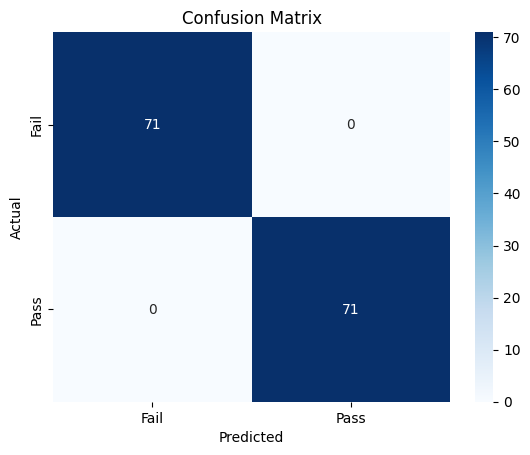

In [16]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(xtrain, ytrain)

ypred = RF.predict(xtest)

print("Accuracy: ", accuracy_score(ytest, ypred))

original_ytest = label_encoders['Pass_Fail'].inverse_transform(ytest)
original_ypred = label_encoders['Pass_Fail'].inverse_transform(ypred)

cm = confusion_matrix(original_ytest, original_ypred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Pass_Fail'].classes_, yticklabels=label_encoders['Pass_Fail'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5304 - loss: 0.6753 - val_accuracy: 0.6754 - val_loss: 0.6184
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7394 - loss: 0.5764 - val_accuracy: 0.8684 - val_loss: 0.5189
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8543 - loss: 0.4677 - val_accuracy: 0.8684 - val_loss: 0.4097
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8841 - loss: 0.3548 - val_accuracy: 0.9123 - val_loss: 0.3124
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9132 - loss: 0.2583 - val_accuracy: 0.9123 - val_loss: 0.2441
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9361 - loss: 0.1927 - val_accuracy: 0.9298 - val_loss: 0.1975
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9547 - loss: 0.1456 - val_accuracy: 0.9474 - val_loss: 0.1561
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9382 - loss: 0.1319 - val_accuracy: 0.9561 - val_loss

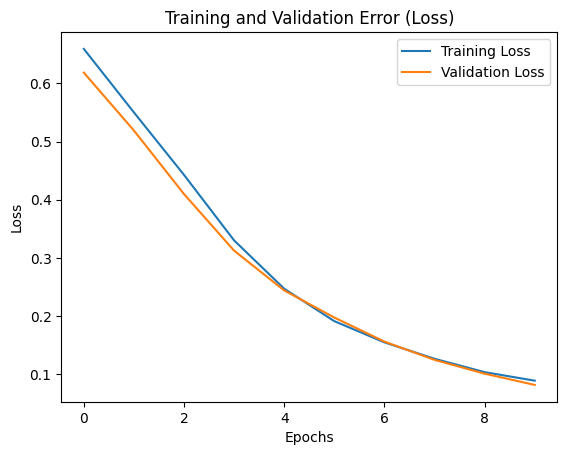

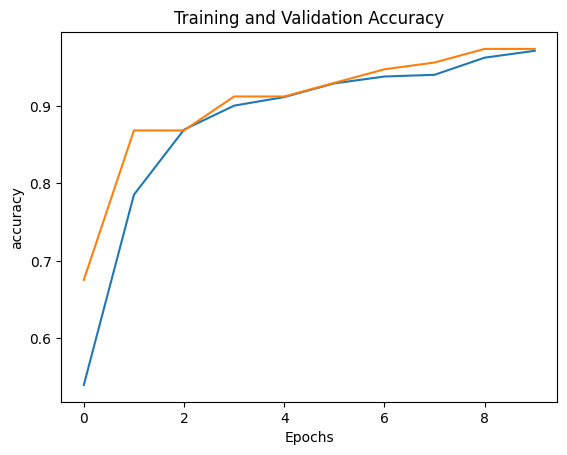

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

network = Sequential(
    [
        Dense(64, activation='relu', input_shape=(xtrain.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

network.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

base_model = network.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = network.evaluate(xtest, ytest)

print('Training Accuracy', base_model.history['accuracy'][-1] * 100)
print('Validation Accuracy', base_model.history['val_accuracy'][-1] * 100)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.plot(base_model.history['loss'], label='Training Loss')
plt.plot(base_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Error (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(base_model.history['accuracy'], label='Training accuracy')
plt.plot(base_model.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7010 - loss: 1.0458 - val_accuracy: 0.8333 - val_loss: 0.8991
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8692 - loss: 0.8550 - val_accuracy: 0.8860 - val_loss: 0.7493
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8993 - loss: 0.7283 - val_accuracy: 0.9123 - val_loss: 0.6497
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9492 - loss: 0.6184 - val_accuracy: 0.9474 - val_loss: 0.5662
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9287 - loss: 0.5672 - val_accuracy: 0.9649 - val_loss: 0.5089
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9502 - loss: 0.5162 - val_accuracy: 0.9912 - val_loss: 0.4638
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9698 - loss: 0.4551 - val_accuracy: 0.9912 - val_loss: 0.4308
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.4205 - val_accuracy: 0.9912 - val_loss: 0.4008
Ep

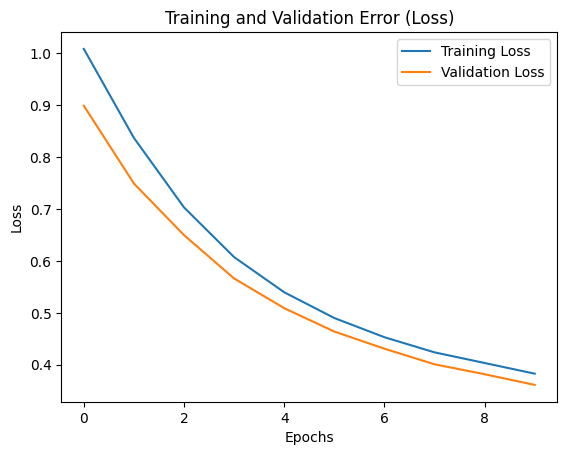

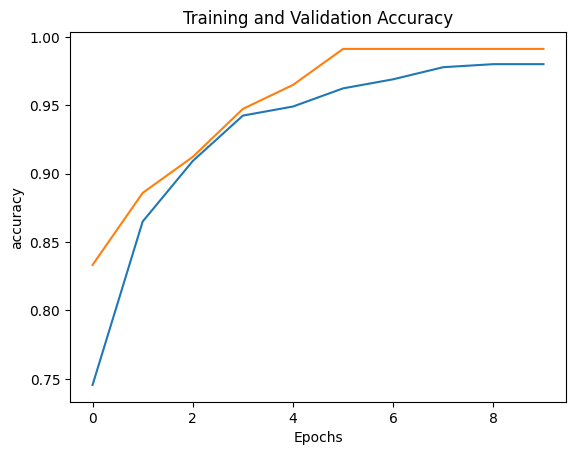

In [38]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
# Regularized model with more Epochs
network = Sequential(
    [
        Dense(64, activation='relu', input_shape=(xtrain.shape[1],), kernel_regularizer=l1_l2(0.001)),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(0.001)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(0.001)),
        Dense(1, activation='sigmoid')
    ]
)

network.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

regularized_model = network.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = network.evaluate(xtest, ytest)

print('Training Accuracy', regularized_model.history['accuracy'][-1] * 100)
print('Validation Accuracy', regularized_model.history['val_accuracy'][-1] * 100)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.plot(regularized_model.history['loss'], label='Training Loss')
plt.plot(regularized_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Error (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(regularized_model.history['accuracy'], label='Training accuracy')
plt.plot(regularized_model.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

## Results:

The model with L2 regularization (Test Accuracy: 98.59%) performed slightly better on the test set compared to the original model without regularization (Test Accuracy: 97.89%). This suggests that the L2 regularization helped the model generalize a bit better to unseen data.

## Comparison

Traditional ML Models (Logistic Regression, Decision Tree, Random Forest): These models achieved very high accuracies, with Decision Tree and Random Forest reaching 100% accuracy on the test set in this specific run. Logistic Regression also performed well with an accuracy of 97.89%.
Deep Learning Models (Keras models): The Keras models also performed very well, with test accuracies around 97.89% and 98.59% (with regularization) with a very simple network and small number of epochs. If we run them with 20 epochs they also achieve 100% accuracy.

In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(xtrain.shape[1],)))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10, # Number of trials to run
    executions_per_trial=3, # Number of models to train for each trial
    )

tuner.search(xtrain, ytrain, epochs=10, validation_split=0.2)

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Deep Learning Hyperparameters:", best_hp.values)

best_dl_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_dl_model.evaluate(xtest, ytest)
print(f"Best Deep Learning Model Test Accuracy: {accuracy * 100:.2f}%")

Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.8742690285046896

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 41s
Best Deep Learning Hyperparameters: {'units_1': 96, 'units_2': 32, 'learning_rate': 0.01}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9946 - loss: 0.0248  
Best Deep Learning Model Test Accuracy: 99.30%


## Final Report

This task involved preparing student performance data by handling categorical features and scaling numerical ones. We then built and evaluated traditional machine learning models (Logistic Regression, Decision Tree, Random Forest) and deep learning models using Keras to predict pass/fail outcomes. Finally, we performed hyperparameter tuning using random search for the models to find optimal configurations and improve performance.Next step was to analyze the results of the different models and select the best one.